**Описание проекта**

Вы аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.
Вам предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В вашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

**Описание тарифов**

**Тариф «Смарт»**

1) Ежемесячная плата: 550 рублей

2) Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика

3) Стоимость услуг сверх тарифного пакета:
  1. минута разговора: 3 рубля («Мегалайн» всегда округляет вверх значения минут и мегабайтов. Если пользователь проговорил всего 1 секунду, в тарифе засчитывается целая минута); 
  2. сообщение: 3 рубля; 
  3. 1 Гб интернет-трафика: 200 рублей.

**Тариф «Ультра»**

1) Ежемесячная плата: 1950 рублей

2) Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика

3) Стоимость услуг сверх тарифного пакета: 
 1. минута разговора: 1 рубль; 
 2. сообщение: 1 рубль; 
 3. 1 Гб интернет-трафика: 150 рублей.

Датасет собирается из 5 источников:
- calls.csv – данные о звонках
- internet.csv – данные об интернет-сессиях
- messages.csv – данные о сообщениях
- tariffs.csv – данные о тарифе
- users.csv – данные о пользователях

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats as st

### Изучение данных

In [2]:
# path = '/datasets/'
path = ''
calls = pd.read_csv(path + 'calls.csv')
internet = pd.read_csv(path + 'internet.csv', index_col=0)
messages = pd.read_csv(path + 'messages.csv')
tariffs = pd.read_csv(path + 'tariffs.csv')
users = pd.read_csv(path + 'users.csv')

**Данные о звонках**

- id — уникальный номер звонка
- call_date — дата звонка
- duration — длительность звонка в минутах
- user_id — идентификатор пользователя, сделавшего звонок

In [3]:
calls.head()

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


In [4]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         202607 non-null  object 
 1   call_date  202607 non-null  object 
 2   duration   202607 non-null  float64
 3   user_id    202607 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB


Пропущенных значений нет, необходимо привести парметр `call_date` к типу datetime.

**Данные об интернет-сессиях**

- id — уникальный номер сессии
- mb_used — объём потраченного за сессию интернет-трафика (в мегабайтах)
- session_date — дата интернет-сессии
- user_id — идентификатор пользователя

In [5]:
internet.head()

,id,mb_used,session_date,user_id
0,1000_0,112.95,2018-11-25,1000
1,1000_1,1052.81,2018-09-07,1000
2,1000_2,1197.26,2018-06-25,1000
3,1000_3,550.27,2018-08-22,1000
4,1000_4,302.56,2018-09-24,1000


In [6]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            149396 non-null  object 
 1   mb_used       149396 non-null  float64
 2   session_date  149396 non-null  object 
 3   user_id       149396 non-null  int64  
dtypes: float64(1), int64(1), object(2)
memory usage: 5.7+ MB


Пропущенных значений нет, необходимо привести парметр `session_date` к типу datetime.

**Данные о сообщениях**

- id — уникальный номер сообщения
- message_date — дата сообщения
- user_id — идентификатор пользователя, отправившего сообщение

In [7]:
messages.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


In [8]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   id            123036 non-null  object
 1   message_date  123036 non-null  object
 2   user_id       123036 non-null  int64 
dtypes: int64(1), object(2)
memory usage: 2.8+ MB


Пропущенных значений нет, необходимо привести парметр `message_date` к типу datetime.

**Данные о тарифе**

- messages_included	 – включено количество смс
- mb_per_month_included – включено количесвто мб
- minutes_included – включено минут разговора
- rub_monthly_fee – ежемесячная плата
- rub_per_gb – стоимость 1 гб интернета
- rub_per_message – стоимость 1 смс
- rub_per_minute – стоимость 1 минуты разговора
- tariff_name – название тарифа

In [9]:
tariffs.head()

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**Данные о пользователях**

- user_id –уникальный идентификатор пользователя
- age – возраст пользователя
- churn_date – дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действоал на момент выгрузки данных)
- city – город проживания пользователя
- first_name – имя пользователя
- last_name – фамилия пользователя
- reg_date – дата подключения тарифа (день, месяц, год)
- tariff – название тарифного плана

In [10]:
users.head()

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


In [11]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   reg_date    500 non-null    object
 7   tariff      500 non-null    object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


В `churn_date` содержаться пропуски типа `NaN`, но эти пропуски объяснимы и устранять их не будем. Необходимо заменить тип данных в столбцах: `churn_date`, `reg_date` на  тип `datetime`.

###  Предобработка данных

Приведём данные в столбцах к типу `datetime`:

In [12]:
calls['call_date'] = pd.to_datetime(calls['call_date'])
internet['session_date'] = pd.to_datetime(internet['session_date'])
messages['message_date'] = pd.to_datetime(messages['message_date'])
users['churn_date'] = pd.to_datetime(users['churn_date'])
users['reg_date'] = pd.to_datetime(users['reg_date'])

Добавим столбец с номером месяца:

In [13]:
calls['month'] = pd.DatetimeIndex(calls['call_date']).month
internet['month'] = pd.DatetimeIndex(internet['session_date']).month
messages['month'] = pd.DatetimeIndex(messages['message_date']).month
users['month'] = pd.DatetimeIndex(users['churn_date']).month
users['month'] = pd.DatetimeIndex(users['reg_date']).month

"Мегалайн" всегда округляет секунды до минуты, а мегабайты - до гигабайт. Округлим вверх длительность разговора - `duration` и приведём к целочисленному типу:

In [14]:
calls['duration'] = np.ceil(calls['duration'])
calls['duration'] = calls['duration'].astype('int')

**Сгруппируем таблицы по пользователям и месяцам**

Количество сделанных звонков и израсходованных минут разговора по месяцам:

In [15]:
calls_moth = calls.pivot_table(index=['user_id', 'month'], values=['duration'],
                              aggfunc=['sum', 'count']).reset_index()
calls_moth.columns = ['user_id', 'month', 'duration', 'count_calls']

Количество отправленных сообщений по месяцам:

In [16]:
messages_month =  messages.pivot_table(index=['user_id', 'month'], values='id',
                              aggfunc='count').reset_index()
messages_month.columns = ['user_id', 'month', 'count_messages']

Объём израсходанного интернет-трайфика по месяцам

In [17]:
inetrnet_month = internet.pivot_table(index=['user_id', 'month'], values='mb_used', aggfunc='sum').reset_index()
inetrnet_month.columns = ['user_id', 'month','mb_used']
inetrnet_month.head()

,user_id,month,mb_used
0,1000,5,2253.49
1,1000,6,23233.77
2,1000,7,14003.64
3,1000,8,14055.93
4,1000,9,14568.91


Округлим полученную сумму (мегабайт) веб-трафика за месяц до гигабайт и приведём к целочисленному типу:

In [18]:
# Перевод в гигабайты и оркугление
inetrnet_month['mb_used'] = np.ceil(inetrnet_month['mb_used'] / 1024)

# Приведём к целочисленному типу
inetrnet_month['mb_used'] = inetrnet_month['mb_used'].astype('int')

# Изменим название столбца в соответсвии с изменениями
inetrnet_month.columns = ['user_id', 'month','gb_used']

**Объединение данных в общий датафрейм**

Объединение таблиц calls_month, internet_month, messages_month

In [19]:
df = calls_moth.merge(messages_month, how='outer', on=['user_id', 'month'])
df_service = df.merge(inetrnet_month, how='outer', on=['user_id', 'month'])
df_service.head() 

,user_id,month,duration,count_calls,count_messages,gb_used
0,1000,5,159.0,22.0,22.0,3.0
1,1000,6,172.0,43.0,60.0,23.0
2,1000,7,340.0,47.0,75.0,14.0
3,1000,8,408.0,52.0,81.0,14.0
4,1000,9,466.0,58.0,57.0,15.0


После объединения таблиц услуг появились записи с пропущенными значениями:

In [20]:
df_service.isna().sum()

user_id             0
month               0
duration           40
count_calls        40
count_messages    497
gb_used            11
dtype: int64

Заполним порпуски нулями, так как пропущенные значения могут означать, что пользователь не использовал услугу:

In [21]:
df_service[['duration', 'count_messages', 'gb_used']] = (
    df_service[['duration', 'count_messages', 'gb_used']].fillna(0))

Поскольку пропущенные звонки (`duration` = 0) учитываются при подсчете количества сделанных звонков, пропуски в столбце `count_calls` заполним количеством `duration`:

In [22]:
df_service['count_calls'] = df_service['count_calls'].fillna(
    df_service.groupby(['user_id', 'month'])['duration'].transform('count'))

Объединение таблиц df_service, users, tariffs

In [23]:
# Объединение таблиц df_service и users по id пользователя и тарифу
df = df_service.merge(users[['user_id', 'tariff', 'city']],  how='left', on=['user_id'])

# замена названия столбца в таблице tariffs
tariffs = tariffs.rename(columns={'tariff_name':'tariff'})

# Объединение с таблицей tariffs
data = df.merge(tariffs,  how='left', on=['tariff'])
data.head()

,user_id,month,duration,count_calls,count_messages,gb_used,tariff,city,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute
0,1000,5,159.0,22.0,22.0,3.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
1,1000,6,172.0,43.0,60.0,23.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
2,1000,7,340.0,47.0,75.0,14.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
3,1000,8,408.0,52.0,81.0,14.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1
4,1000,9,466.0,58.0,57.0,15.0,ultra,Краснодар,1000,30720,3000,1950,150,1,1


In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3214 entries, 0 to 3213
Data columns (total 15 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                3214 non-null   int64  
 1   month                  3214 non-null   int64  
 2   duration               3214 non-null   float64
 3   count_calls            3214 non-null   float64
 4   count_messages         3214 non-null   float64
 5   gb_used                3214 non-null   float64
 6   tariff                 3214 non-null   object 
 7   city                   3214 non-null   object 
 8   messages_included      3214 non-null   int64  
 9   mb_per_month_included  3214 non-null   int64  
 10  minutes_included       3214 non-null   int64  
 11  rub_monthly_fee        3214 non-null   int64  
 12  rub_per_gb             3214 non-null   int64  
 13  rub_per_message        3214 non-null   int64  
 14  rub_per_minute         3214 non-null   int64  
dtypes: f

Рассчитаем помесячную выручку с каждого пользователя:

In [25]:
def revenue(row):
# вычтем бесплатный лимит из суммарного количества звонков, сообщений и интернет-трафика; 
# остаток умножаем на значение из тарифного плана;
# прибавим абонентскую плату, соответствующую тарифному плану

    calls = max(0, (row['duration'] - row['minutes_included']) * row['rub_per_minute'])
    sms = max(0, (row['count_messages'] - row['messages_included']) * row['rub_per_message'])
    traffic = max(0, (row['gb_used'] - np.ceil(row['mb_per_month_included']/1024)) * row['rub_per_gb'])
     
    return calls + sms +  traffic + row['rub_monthly_fee']
   
data['revenue'] = data.apply(revenue, axis=1)

### Анализ данных

Отфильтруем данные по тарифу:

In [26]:
df_smart = data[data['tariff'] == 'smart']
df_ultra = data[data['tariff'] == 'ultra']
print(df_smart.info())
print(df_ultra.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2229 entries, 8 to 3212
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   user_id                2229 non-null   int64  
 1   month                  2229 non-null   int64  
 2   duration               2229 non-null   float64
 3   count_calls            2229 non-null   float64
 4   count_messages         2229 non-null   float64
 5   gb_used                2229 non-null   float64
 6   tariff                 2229 non-null   object 
 7   city                   2229 non-null   object 
 8   messages_included      2229 non-null   int64  
 9   mb_per_month_included  2229 non-null   int64  
 10  minutes_included       2229 non-null   int64  
 11  rub_monthly_fee        2229 non-null   int64  
 12  rub_per_gb             2229 non-null   int64  
 13  rub_per_message        2229 non-null   int64  
 14  rub_per_minute         2229 non-null   int64  
 15  reve

Построим гистограмму распределения для параметров: `duration`, `count_messages`, `gb_used` соответвующего тарифа

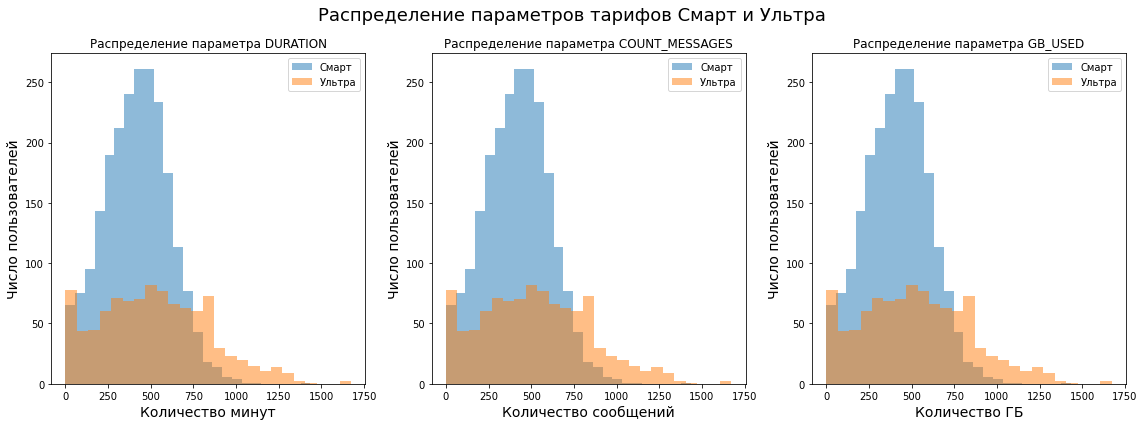

In [27]:
service = ['duration', 'count_messages', 'gb_used']
axis_x = ['Количество минут', 'Количество сообщений', 'Количество ГБ']

fig, axes = plt.subplots(1, 3, figsize=(16,6))
fig.suptitle('Распределение параметров тарифов Смарт и Ультра', fontsize=18)
for i, val in enumerate(service):
    data.groupby('tariff')['duration'].plot.hist(alpha=0.5, legend=True, bins=25, ax=axes[i], title=f'Распределение параметра {val.upper()}')
    axes[i].legend(['Смарт', 'Ультра'])
    axes[i].set_xlabel(axis_x[i], fontsize=14)
    axes[i].set_ylabel('Число пользователей', fontsize=14)
    plt.tight_layout()

plt.show() 

Посчитаем среднее количество, дисперсию и стандартное отклонение. 

In [28]:
df_tariff = data.pivot_table(
    index='tariff', values=['duration', 'count_messages', 'gb_used'], aggfunc=['mean', 'median', 'var', 'std']).reset_index()
df_tariff

tariff           mean                                median           \
         count_messages    duration    gb_used count_messages duration   
0  smart      33.384029  417.934948  16.328847           28.0    422.0   
1  ultra      49.363452  526.623350  19.494416           38.0    518.0   

                     var                                      std              \
  gb_used count_messages       duration    gb_used count_messages    duration   
0    17.0     796.812958   36219.315784  33.028705      28.227876  190.313730   
1    19.0    2285.266143  100873.633397  97.091686      47.804457  317.606098   

             
    gb_used  
0  5.747061  
1  9.853511

**Вывод**

По постороенным гистограммам и найденным статистикам можно сделать следующие выводы:
 - большинство пользователей пользуются тарифом `smart`
 - в тарифе `smart` пользователи чаще тратят 450-550 минут разговора, для тарифа `ultra` количество потраченных маинут в месяц около 600;
 - большинство пользователей тарифа `smart` тратят в месяц около 40 смс, а большая часть пользователей тарифа `ultra` в среднем тратит 50 смс в месяц;
 - пользователи тарифа `smart` чаще тратят 17 гб интернет трафика, пользователи тарифа `ultra` чаще тратят 15-20 гб интернет трафика

### Проверка гипотез

Мы рассчитали выручку с пользователей тарифов «Ультра» и «Смарт». 

**Проверим гипотезу о том, что средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.**

$H_0$: **revenue_smart = revenue_ultra**

$H_1$: **revenue_smart $\neq$ revenue_ultra**

Для проверки гипотезы о равенстве выборочных средних мы используем метод scipy.stats.ttest_ind(). Так как дисперсии в выборках разные, парметр метода `equal_var` выставим False:

In [29]:
# Проверка гипотезы

# Критический уровень статистической значимости
alpha = .01
results = st.ttest_ind(df_smart['revenue'], df_ultra['revenue'], equal_var=False)
print('p-значение: ', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение:  4.2606313931076085e-250
Отвергаем нулевую гипотезу


Мы проверили двустороннюю гипотезу о равенстве средних, нулевая гипотеза не подтвердилсь. Можем сделать вывод, что средние выборок выручки по двум тарифам не равны.

**Сравним выборочное среднее выручки тирафа «Ультра» и тарифа «Смарт»**

In [30]:
print(f"Среднее выручки тарифа Смарт: {df_smart['revenue'].mean()}")
print(f"Среднее выручки тарифа Утра: {df_ultra['revenue'].mean()}")

Среднее выручки тарифа Смарт: 1289.9735307312696
Среднее выручки тарифа Утра: 2070.1522842639592


Действительно средняя выручка тарифа «Ультра» превышает среднюю выручку тарифа «Смарт».

**Проверим гипотезу о том, что средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.**

$H_0$: **revenue_city_moscow = revenue_city_other**

$H_1$: **revenue_city_moscow $\neq$ revenue_city_other**

In [31]:
# Сформируем датавреймы по условию 
revenue_city_moscow = data.query('city == "Москва"')['revenue']
revenue_city_other = data.query('city != "Москва"')['revenue']

# Проверка гипотезы
# Критический уровень статистической значимости
alpha = .05
results = st.ttest_ind(revenue_city_moscow, revenue_city_other)
print('p-значение:', results.pvalue)

if results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу") 

p-значение: 0.5440152911670224
Не получилось отвергнуть нулевую гипотезу


Полученное значение p-value говорит о том, что вероятность получить такое или большее различие случайно почти 10%, хотя средние выручки в Москве и других городах различаются. Такая вероятность позволяет сделать вывод что значимого различия между средними выручки нет.

Мы не использовали дополнительный параметр equal_var = False, потому что у нас достаточно большие и одинаковые по размеру выборки, к тому же в обеих измерена одна и та же переменная — нет оснований полагать, что разброс будет сильно отличаться.

### Общий вывод

Было проведено исследование тарифов «Ультра» и «Смарт» и выявлено, что средний пользователь тарифа «Ультра» не использует в полной мере включенный пакет услуг. Также подтвердилась гипотеза, что выборочное средние выручки тарифа «Ультра» превышает выборочное средние выручки тарифа «Смарт». Можно сделать вывод, что для компании выгоднее тариф «Ультра».